1. Intensity Transformation

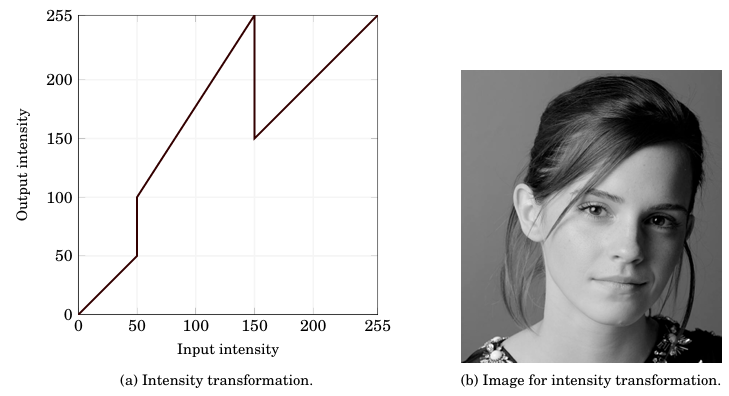

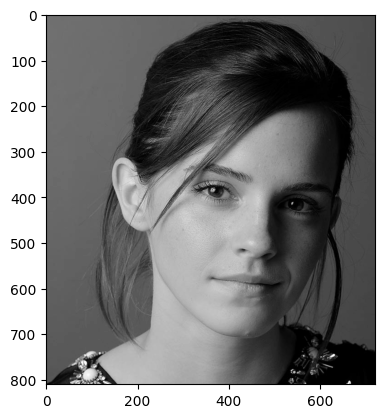

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images\\emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# plot the image
plt.imshow(img, cmap='gray')
plt.show()